In [125]:
import pandas as pd
import seaborn as sns
import numpy as np

In [126]:
df = pd.read_excel('База для ЛЭТИ.xlsx')

# Обработка

In [127]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,Unnamed: 384,"FSFI: Удовлетворение (из 6,0)",Unnamed: 386,Unnamed: 387,"FSFI: Боль (из 6,0) (6,0 - никогда)",Unnamed: 389,Unnamed: 390,"FSFI: сумма (из 36,0)",Unnamed: 392,Unnamed: 393
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.iloc[0, 136] = 'Через 1-12 мес'

/tmp/ipykernel_28253/1724707377.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Через 1-12 мес' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.iloc[0, 136] = 'Через 1-12 мес'


### Заменим NaN на пропуски и описание времени добавим в название столбца

In [129]:
for i in range(len(df.columns)):
    if type(df.iloc[0, i]) != str:
        df.iloc[0, i] = ''

/tmp/ipykernel_28253/2331151346.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0, i] = ''


In [130]:
for i, column in enumerate(df.columns):
    if 'Unnamed' in column:
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})
    else:
        last_column = column
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})

In [131]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,"FSFI: Оргазм (из 6,0) >12","FSFI: Удовлетворение (из 6,0) До БО","FSFI: Удовлетворение (из 6,0) Через 1-12 мес","FSFI: Удовлетворение (из 6,0) >12","FSFI: Боль (из 6,0) (6,0 - никогда) До БО","FSFI: Боль (из 6,0) (6,0 - никогда) Через 1-12 мес","FSFI: Боль (из 6,0) (6,0 - никогда) >12","FSFI: сумма (из 36,0) До БО","FSFI: сумма (из 36,0) Через 1-12 мес","FSFI: сумма (из 36,0) >12"
0,,,,,,,,,,,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Удалим нулевую строку
df = df[1:]

In [133]:
df.index = [i for i in range(len(df))]

# Антимюллеров гормон

### Посмотрим в каких строках непустые ячейки у столбцов АМГ

In [134]:
df.columns[174:176]

Index(['АМГ, нг/мл (0,5-19,6 нг/мл) До БО', 'АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес'], dtype='object')

In [135]:
not_empty_rows = []
for i, elem in enumerate(zip(df.iloc[:, 174], df.iloc[:, 175])):
    if all([not np.isnan(elem[0]), not np.isnan(elem[1])]):
        not_empty_rows.append(i)

### Достанем все столбцы, в строках not_empty_rows которых больше 70% непустых значений

In [136]:
not_empty_columns = []
for column in df.columns:
    try:
        count = 0
        for elem in df[column][not_empty_rows]:
            if np.isnan(elem) == False:
                count += 1
        
        if count/len(not_empty_rows) > 0.7:
            not_empty_columns.append(column)
    except:
        pass

In [137]:
len(not_empty_columns)

35

In [138]:
df_amg = df.loc[:, not_empty_columns]
df_amg = df_amg.iloc[not_empty_rows]

### Удалим лишние столбцы

In [139]:
for i, column in enumerate(df_amg.columns):
    print(i, column)

0 Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) 
1 Возраст на момент операции 
2 НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
3 НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
4 Беременности 
5 Количество беременностей, закончившихся родами до БО 
6 Прерывание беременности по тем или иным причинам 
7 Курение 0 - нет, 1 - да 
8 Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 
9 Сколько раз худела >10% (экстремальное похудение) 
10 Длительность ожирения до операции 
11 Были ли операции на яичниках 0 нет 1 да 
12 Соблюдение рекомендаций после БО 0 -нет, 1- да 
13 ИМТ на момент операции 
14 ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)
15 Глик гем, % (<6) До БО
16 Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО
17 Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) Через 6-12 мес
18 Инсулин, мкМЕ/л (2-23) До БО
19 Инсулин, мкМЕ/л (2-23) Через 6-12 мес
20 Индекс HOMA-IR (<2,7) (инсулин х г

In [140]:
df_amg = df_amg.drop(columns = ['Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) Через 6-12 мес', 'Инсулин, мкМЕ/л (2-23) Через 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 Черз 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 До БО', 'число фолликулов пр яиник >12', 'число фолликуов левый яиник >12', 'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) Через 6-12', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', 'НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ', 'Соблюдение рекомендаций после БО 0 -нет, 1- да ', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', ])

In [141]:
df_amg.columns

Index(['Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) ',
       'Возраст на момент операции ',
       'НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ',
       'Беременности ',
       'Количество беременностей, закончившихся родами до БО ',
       'Прерывание беременности по тем или иным причинам ',
       'Курение 0 - нет, 1 - да ',
       'Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да ',
       'Сколько раз худела >10% (экстремальное похудение) ',
       'Длительность ожирения до операции ',
       'Были ли операции на яичниках 0 нет 1 да ', 'ИМТ на момент операции ',
       'Глик гем, % (<6) До БО',
       'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО',
       'Инсулин, мкМЕ/л (2-23) До БО',
       'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
       'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес',
     

In [142]:
df_amg['Увеличилось ли АМГ'] = [1 if elem < 0 else 0 for elem in df_amg['АМГ, нг/мл (0,5-19,6 нг/мл) До БО'] - df_amg['АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес']] 

In [143]:
df_amg.index = [i for i in range(len(df_amg))]

In [144]:
df_amg = df_amg.drop(columns = ['АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес'])

In [145]:
df_amg.head(10)

,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)",Беременности,"Количество беременностей, закончившихся родами до БО",Прерывание беременности по тем или иным причинам,"Курение 0 - нет, 1 - да","Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да",Сколько раз худела >10% (экстремальное похудение),Длительность ожирения до операции,...,"Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО","ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО","ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО","ЛГ/ФСГ (0,75-0,95) До БО","Витамин Д, нг/мл До БО",число фолликулов пр яиник До БО,число фолликуов левый яиник До БО,Увеличилось ли АМГ
0,1,34.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,5.0,...,3.4,6.3,4.2,6.1,7.8,0.782051,15,8,7,0
1,1,33.0,1.0,2.0,2.0,0.0,0.0,1.0,5.0,4.0,...,5.6,4.5,2.9,7.2,8.1,0.888889,12,10,8,1
2,1,28.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,...,4.2,4.7,2.7,6.1,5.6,1.089286,13,8,7,1
3,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,...,3.1,5.1,2.2,5.6,6.1,0.918033,15,8,8,1
4,1,33.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0,...,5.4,5.1,2.8,5.1,7.2,0.708333,20,7,8,1
5,1,34.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,5.0,...,4.1,6.1,2.7,7.2,8.2,0.878049,23,6,5,1
6,1,36.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,...,5.1,4.9,2.1,7.1,6.2,1.145161,26,7,6,1
7,1,33.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,...,6,5.4,2,6.1,7.2,0.847222,27,6,5,1
8,1,34.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,...,7.1,4.5,1.7,5.2,10.1,0.514851,20,6,7,1
9,1,31.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,9.0,...,4.9,5.1,1.8,6.3,8.1,0.777778,21,9,6,1


In [39]:
feature_scores.index

Index(['ИМТ на момент операции ', 'Глик гем, % (<6) До БО',
       'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) До БО', 'ЛГ/ФСГ (0,75-0,95) До БО',
       'Инсулин, мкМЕ/л (2-23) До БО',
       'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО',
       'Сколько раз худела >10% (экстремальное похудение) ',
       'Возраст на момент операции ', 'число фолликуов левый яиник До БО',
       'Длительность ожирения до операции ', 'число фолликулов пр яиник До БО',
       'ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО',
       'ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО',
       'Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да ',
       'ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО',
       'Витамин Д, нг/мл До БО', 'Курение 0 - нет, 1 - да ',
       'Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - 

In [93]:
feature_scores.index[0:5]

Index(['ИМТ на момент операции ', 'Глик гем, % (<6) До БО',
       'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) До БО', 'ЛГ/ФСГ (0,75-0,95) До БО'],
      dtype='object')

In [146]:
df_amg = df_amg.loc[:, ['ИМТ на момент операции ', 'Глик гем, % (<6) До БО',
       'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО',
       'АМГ, нг/мл (0,5-19,6 нг/мл) До БО', 'Увеличилось ли АМГ']]

In [147]:
df_amg

,ИМТ на момент операции,"Глик гем, % (<6) До БО","Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО",Увеличилось ли АМГ
0,35.1,6,3.4,4.2,0
1,33.8,5.4,5.6,2.9,1
2,39.1,5.8,4.2,2.7,1
3,38.5,5.1,3.1,2.2,1
4,40.4,5.2,5.4,2.8,1
5,38.2,4.7,4.1,2.7,1
6,40.3,5.1,5.1,2.1,1
7,40.8,4.9,6,2,1
8,39.9,5.1,7.1,1.7,1
9,45.1,5.3,4.9,1.8,1


# Обучение

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
import random
import pickle

In [149]:
fillna_dict = {column: np.mean(df_amg[column]) for column in df_amg.columns}

In [150]:
df_amg = df_amg.fillna(fillna_dict)

In [151]:
X = df_amg.loc[:, df_amg.columns != 'Увеличилось ли АМГ']
y = df_amg.loc[:, df_amg.columns == 'Увеличилось ли АМГ']

In [152]:
model_names = ['logreg', 'knn', 'svc', 'nb', 'dt', 'rt', 'xgbx']
models_auc_dict = {model: [] for model in model_names}

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

rt = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt')
rt.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [157]:
pickle.dump(rt, open('model.pkl', 'wb'))

In [122]:
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
    np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

    #clf = LogisticRegression(random_state=22, max_iter=1000)
    logreg = LogisticRegression(random_state = 0, max_iter=1000)
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    svc = SVC()
    nb = BernoulliNB()
    rt = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt')
    xgbx = xgb.XGBClassifier()

    models = [logreg, knn, svc, nb, dt, rt, xgbx]

    for model in models:
        model.fit(X_train, y_train.ravel())
    
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        
        models_auc_dict[model_names[i]].append(accuracy_score(y_test, y_pred.round(0)))

In [123]:
for model_name in models_auc_dict.keys():
    print(f'{model_name}: {np.mean(models_auc_dict[model_name])}')

logreg: 0.749375
knn: 0.77875
svc: 0.61
nb: 0.574375
dt: 0.728125
rt: 0.836875
xgbx: 0.844375


# Важности признаков

In [31]:
import matplotlib.pyplot as plt 

In [192]:
feature_importances = rt.feature_importances_

In [193]:
for i, column in enumerate(X.columns):
    print(column, feature_importances[i])

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  0.027257825450087435
Возраст на момент операции  0.0503390543098475
НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)  0.0182063030077087
Беременности  0.007831115847031181
Количество беременностей, закончившихся родами до БО  0.0076379564186593064
Прерывание беременности по тем или иным причинам  0.005630554411555507
Курение 0 - нет, 1 - да  0.011777965562223594
Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да  0.013679660551089125
Сколько раз худела >10% (экстремальное похудение)  0.016501387534654598
Длительность ожирения до операции  0.05838813829589341
Были ли операции на яичниках 0 нет 1 да  0.010731702006402553
ИМТ на момент операции  0.11427725109598225
Глик гем, % (<6) До БО 0.021684714627905492
Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО 0.014091281410235286
Инсулин, мкМЕ/л (2-23) До БО 0.13926232168307853
Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО

/tmp/ipykernel_28253/1724717015.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


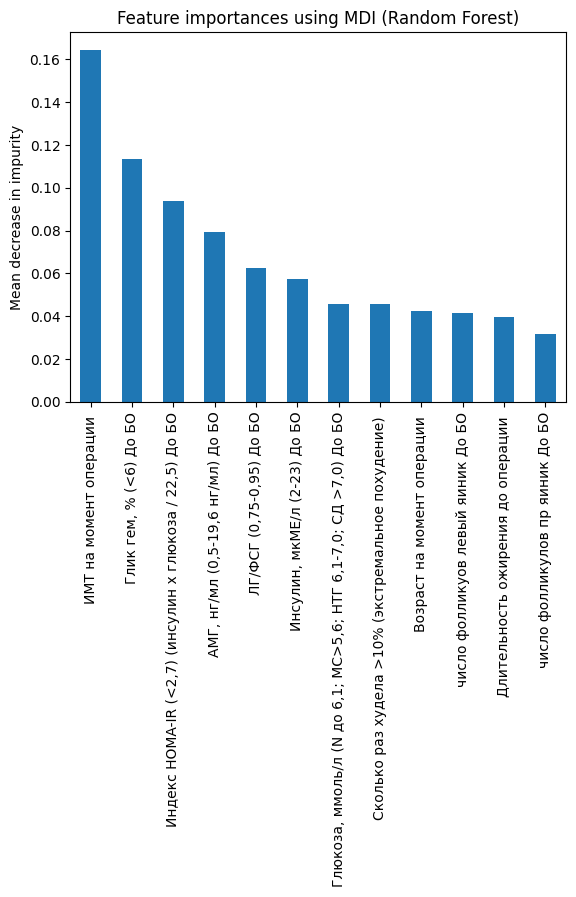

In [33]:
feature_names = X.columns

feature_importances = rt.feature_importances_

feature_scores = pd.Series(rt.feature_importances_, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_scores[:12].plot.bar(ax=ax)
ax.set_title("Feature importances using MDI (Random Forest)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Метод главных компонент

In [42]:
from sklearn import decomposition
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA')

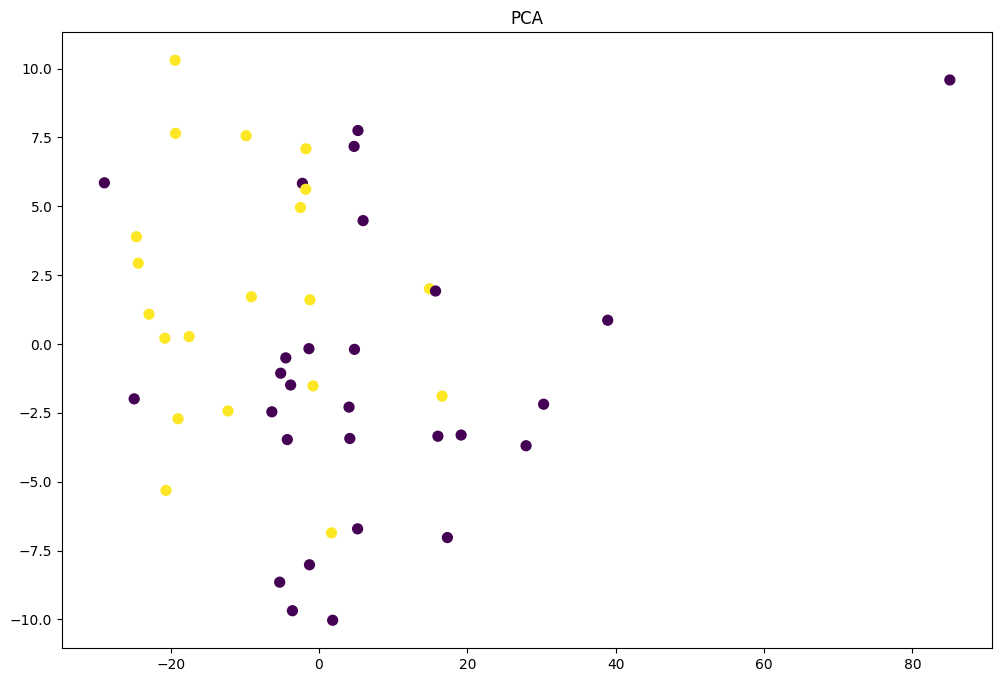

In [54]:
# Visualizing using PCA
pca = decomposition.PCA(n_components=4)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y.values, s=50, cmap='viridis')
plt.title('PCA')

In [45]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )

1 component: 84.64% of initial variance
2 component: 5.86% of initial variance


Text(0.5, 1.0, 'PCA')

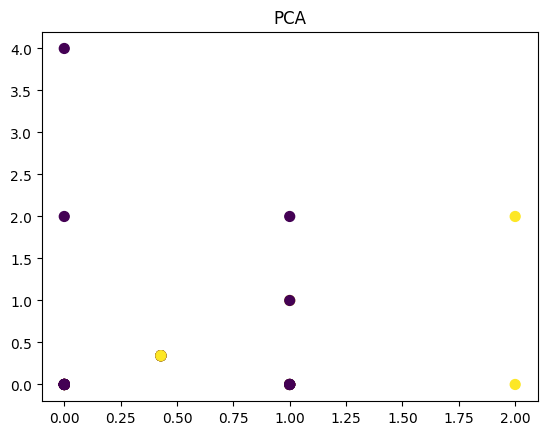

In [172]:
plt.scatter(list(X.iloc[:, 4]), list(X.iloc[:, 5]), c=y.values, s=50, cmap='viridis')
plt.title('PCA')